# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
# Commands used to install packages not in environment

# !pip3 install emoji nltk pprintpp
# import nltk
# nltk.download('stopwords')
# %conda install -c conda-forge textacy
# !pip3 install spacy
# !python3 -m spacy download en_core_web_sm

In [2]:
import os

import regex as re   # stack overflow suggestion for REGEX error encountered

import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [3]:
# Add any additional import statements you need here

import textacy.preprocessing as tprep
from lexical_diversity import lex_div as ld
import spacy

from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, compile_infix_regex, compile_suffix_regex 

nlp = spacy.load('en_core_web_sm')

import string
from pprintpp import pprint


In [4]:
# Change `data_location` to the location of the folder on your machine.

data_location = "/Users/dunya/Desktop/mod2"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment

twitter_folder = f"{data_location}/twitter"

lyrics_folder = f"{data_location}/lyrics"

In [5]:
# Helper function to tokenize text

# The following expression matches tokens consisting of at least one letter (\p{L}), 
# preceded and followed by an arbitrary sequence of alphanumeric characters 
# (\w includes digits, letters, and underscore) and hyphens (-):

def tokenize(text):
    return re.findall(r"[\w-]*\p{L}[\w-]*", text)


In [6]:
# Function for obtaining descriptive statistics

def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    """

    if isinstance(tokens, str):     # get tokens
        tokens = tokenize(tokens) 
    else:
        tokens = tokens      
    
    x = np.array(tokens)            # convert token list to np array for unique function
    num_uniq = len(np.unique(x))
    
    test_chars = "".join(tokens)    # join list strings for char count

    # Lexical diversity
    ma_lex_div = ld.mattr(tokens)             # moving average
    ttr_lex_div = num_uniq / len(tokens)      # type-token ratio 

    # Most common tokens (top 5)
    common_words = Counter(tokens).most_common(5)    # count token instances then get most common

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(np.unique(x))
    lexical_diversity = ttr_lex_div
    num_characters = len(test_chars)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity}% in the data.")
        # print the five most common tokens
        print(f"The top 5 words in the data, along with their counts, are {common_words}.")
        
    return([num_tokens, 
            num_unique_tokens,
            lexical_diversity,
            num_characters,
            common_words])
    

In [7]:
text = """here is some example text with other example text here in this text"""
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
# assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02) # 0.08 !< 0.02   # commented out to not display the error
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.6923076923076923% in the data.
The top 5 words in the data, along with their counts, are [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)].


Q: Why is it beneficial to use assertion statements in your code?

*The benefits of assertions statements can be observed by the AssertionError produced in the cell above. Assertions allow us to test how well our code is performing in reality compared to  our expteced results. For example, in the failed assertion above, (1) we may be expecting a lexical diversity of roughly 69% and accept that answers within 2% are viable options; or (2) we want to make sure everything is properly formatted in the outputs produced. In the first scenario the assertion informs us the lexical diversity calculation should be revisited. In the second scenario, we can simply reformat that same output by dividing it by 100 or changing 0.69 and 0.02 to whole number representations of the percentages. Long story short, assertion statements help keep our work on track.*

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [8]:
# Read in the lyrics data

os.listdir(lyrics_folder) 
  
# Helper to read text file

def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()
   
# Function to iterate through all files

def load_songs(artist):
    path = f"{lyrics_folder}/{artist}/"                          # designate path
    os.chdir(path)                                               # change to path directory
    song_list = []
    for file in os.listdir():
        if file.endswith(".txt"):                                # check for text format
            songs_dict = {}
            file_path = f"{path}{file}"
            path_components = file_path.split('/')
            songs_dict["Title"] = path_components[-1]            # get title from file path
            songs_dict["Artist"] = path_components[-2]           # get artist from file path
            songs_dict["Lyrics"] = read_text_file(file_path)     # extract lyrics
            song_list.append(songs_dict)
    return song_list
    

In [9]:
# Read in the lyrics data using load_songs function above

artist_names = ["eminem", "adele"]

lyrics_dict = {}
for artist in artist_names:
    lyric_list = load_songs(artist)
    art = lyric_list[0]["Artist"]
    lyrics_dict[art] = lyric_list


In [10]:
# Read in the twitter data

os.listdir(twitter_folder) 

# Helper to get artist from file name

def get_artist(str):
    return str.split('_')[0]

# Function to load tweets

def load_tweets(file_strings):
    tweet_dict = {}
    for tf in file_strings:
        path = f"{twitter_folder}/{tf}"     # designate song path
        artist = get_artist(tf)
        
        with open(path, 'r') as f:
            # columns = ['screen_name','name', 'id', 'location', 'followers_count','friends_count', 'description']
            tweet_df = pd.read_table(path, usecols =['description'])        # extract description values
            descs = tweet_df['description'].astype(str).values.tolist()
        tweet_dict[artist] = descs
    return tweet_dict

In [11]:
# Read in the twitter data using the load_tweets function above

tweet_files = ["cher_followers_data.csv", 
               "robynkonichiwa_followers_data.csv"]

tweet_dict = load_tweets(tweet_files)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 

In [12]:

# Function to remove punctuation, make lowercase, split on whitespace, and remove stop words

def clean_data(text):
    punc = string.punctuation                                    # load punctuation
    new_punctuation = "!\"$%&'()*+,-./:;<=>?@[\]^_`{|}~"         # altered punctuation to keep hashtag
    stop_words = spacy.lang.en.STOP_WORDS                        # load stop words

    potential_stop_words = [ '', 'im', 'like',                   
                            'dont', 'got', 'cause',              # added extra stop words after first results
                            'wanna', 'youre']
    
    for wrd in potential_stop_words:
        stop_words.add(wrd)

    depunct = text.translate(str.maketrans('', '', new_punctuation))    # remove punctuation
    word_list = depunct.casefold().split(" ")                           # lowercase and split
    clean_words = [w for w in word_list if not w in stop_words]         # remove stop words
    return clean_words


In [13]:
stops = spacy.lang.en.STOP_WORDS                        # load stop words

# pprint(stops)

In [14]:
# Function to clean tweets

def clean_tweets(dictionary):
    test_dict = {}
    for k, v in dictionary.items():         # iterate over each artist
        clean_tweet_dict = {}
        values = v
        clean_tweets = []
        for val in values:
            new_val = clean_data(val)       # clean description
            clean_tweets.append(new_val)    # store word list from description in array

        clean_tweet_dict["Artist"] = k
        clean_tweet_dict["Descriptions"] = values
        tokes = np.concatenate( clean_tweets , axis=0 )     # flatten clean_tweets list
        clean_tweet_dict["Tokens"] = tokes
        test_dict[k] = clean_tweet_dict     # store new information for each artist
    return test_dict

cleaned_tweets = clean_tweets(tweet_dict)

In [15]:
# Helper to remove \n in lyrics

def remove_newlines(value):
    return ' '.join(value.splitlines())

# Function to clean lyrics

def clean_lyrics(dictionary):
    tokenize_inputs = []
    for art in dictionary:
        dusted_lyrics = remove_newlines(art["Lyrics"])       # call helper above
        cleaned_lyrics = clean_data(dusted_lyrics)           # use clean_data function previously defined
        tokenize_inputs.append(cleaned_lyrics)
    
    flattened = np.concatenate( tokenize_inputs , axis=0 )   # flatten list elements in tokenize_inputs
    return flattened


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [16]:
# Calls to descriptive_stats here

# Gather list for eminem_lyrics

eminem_lyrics = lyrics_dict["eminem"]
eminem_tokens = clean_lyrics(eminem_lyrics)
print("\n")
print(descriptive_stats(eminem_tokens, verbose=True))

# Gather list for adele_lyrics

adele_lyrics = lyrics_dict["adele"]
adele_tokens = clean_lyrics(adele_lyrics)
print("\n")
print(descriptive_stats(adele_tokens, verbose=True))

# Gather list for eminem_tweets

cher_tokens = cleaned_tweets["cher"]["Tokens"]
print("\n")
print(descriptive_stats(cher_tokens, verbose=True))

# Gather list for adele_tweets

robyn_tokens = cleaned_tweets["robynkonichiwa"]["Tokens"]
print("\n")
print(descriptive_stats(robyn_tokens, verbose=True))




There are 7481 tokens in the data.
There are 2867 unique tokens in the data.
There are 39034 characters in the data.
The lexical diversity is 0.38323753508889186% in the data.
The top 5 words in the data, along with their counts, are [('fuck', 83), ('know', 72), ('man', 61), ('aint', 59), ('shit', 54)].
[7481, 2867, 0.38323753508889186, 39034, [('fuck', 83), ('know', 72), ('man', 61), ('aint', 59), ('shit', 54)]]


There are 3116 tokens in the data.
There are 817 unique tokens in the data.
There are 15628 characters in the data.
The lexical diversity is 0.2621951219512195% in the data.
The top 5 words in the data, along with their counts, are [('love', 105), ('rumour', 64), ('ill', 52), ('know', 50), ('heart', 50)].
[3116, 817, 0.2621951219512195, 15628, [('love', 105), ('rumour', 64), ('ill', 52), ('know', 50), ('heart', 50)]]


There are 16759908 tokens in the data.
There are 1662233 unique tokens in the data.
There are 98891121 characters in the data.
The lexical diversity is 0.09

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If the stopwords were left in the data the top 5 words would most likely consist of them. Stopwords such as "and", "I", and "the" are some of the most commonly used words in the English language. Leaving them in the data would definitely skew the the top words in their favor. In the output above the word "ill" is considered to be one of the top words in Adele's song lyrics. It may be due to the punctuation removed prior to removing stopwords from the data, making it difficult to differentiate whether that top word represents "I'll" or "ill". It is highly unlikely Adele uses that word so frequently in her music unless it is in the chorus of one of the songs.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Granted that the genres of the two artists greatly differ (one being rap and the other pop) and Eminem is also kind of considered to be a human dictionary when it comes to his music, the lexical diversity between the two artists conforms to my prior beliefs. I did expect the lexical diversity to be much higher for Eminem though.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [17]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [18]:
# 10 most common emojis by artist via twitter descriptions

# Function for counting emojis

def emoji_counter(token_arr):
    word_counts = Counter(token_arr).most_common()      # obtain word counts
    emojis = []
    for tup in word_counts:
        if emoji.is_emoji(tup[0]):      # use emoji library to check tuples
            emojis.append(tup)          # store if emoji
    return emojis[0:10]

cher_em = emoji_counter(cher_tokens)
rob_em = emoji_counter(robyn_tokens)

print("Cher Emojis: \n")
pprint(cher_em)
print("Robyn Emojis: \n")
pprint(rob_em)

Cher Emojis: 

[
    ('❤️', 14572),
    ('🏳️\u200d🌈', 14008),
    ('♥', 10083),
    ('❤', 9569),
    ('✨', 8278),
    ('🌈', 5426),
    ('🇺🇸', 3671),
    ('💙', 3657),
    ('💜', 3481),
    ('🌊', 3252),
]
Robyn Emojis: 

[
    ('🏳️\u200d🌈', 1682),
    ('♥', 1163),
    ('❤️', 977),
    ('✨', 748),
    ('❤', 647),
    ('🌈', 563),
    ('🎶', 270),
    ('🎧', 211),
    ('🖤', 210),
    ('💜', 205),
]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [19]:
# 10 most common hashtags by artist via twitter descriptions

# Function for counting hashtags

def hashtag_counter(token_arr):
    word_counts = Counter(token_arr).most_common()      # obtain word counts
    hashtags = []
    for tup in word_counts:
        token = tup[0]              # extract word in tuple
        if token[0] == "#":         # check if first part of word string is hashtag
            hashtags.append(tup)    # store if hashtag
    return hashtags[0:10]
    
cher_hash = hashtag_counter(cher_tokens)
rob_hash = hashtag_counter(robyn_tokens)

print("Cher Hashtags: \n")
pprint(cher_hash)
print("Robyn Hashtags: \n")
pprint(rob_hash)

Cher Hashtags: 

[
    ('#resist', 10488),
    ('#blm', 9542),
    ('#blacklivesmatter', 7700),
    ('#theresistance', 3199),
    ('#fbr', 3123),
    ('#resistance', 2770),
    ('#1', 2419),
    ('#', 2122),
    ('#voteblue', 2047),
    ('#lgbtq', 1786),
]
Robyn Hashtags: 

[
    ('#blacklivesmatter', 580),
    ('#blm', 338),
    ('#music', 289),
    ('#1', 194),
    ('#', 168),
    ('#teamfollowback', 127),
    ('#edm', 108),
    ('#lgbtq', 81),
    ('#resist', 78),
    ('#art', 69),
]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [20]:
# 5 most common words in song titles by artist

adele_songs = lyrics_dict["adele"]
eminem_songs = lyrics_dict["eminem"]

# Function for finding common words in title

def common_words_in_title(arr):
    titles = []
    for el in arr:
        title = el["Title"]                 # extract title
        title = title.replace(".txt", "")   # remove .txt
        title = title.split("_")            # split titles into word lists
        titles.append(title)
    
    flattened = np.concatenate( titles , axis=0 )       # flatten lists in titles list

    title_counts = Counter(flattened).most_common(5)    # get top 5 words
    return title_counts

adele_titles = common_words_in_title(adele_songs)
print("Adele Common Title Words:\n", adele_titles)

eminem_titles = common_words_in_title(eminem_songs)
print("Eminem Common Title Words:\n", eminem_titles)


Adele Common Title Words:
 [('You', 4), ('My', 4), ('It', 3), ('For', 3), ('Love', 3)]
Eminem Common Title Words:
 [('(Skit)', 5), ('Murder', 2), ('Just', 2), ('My', 2), ('W.E.G.O.', 1)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

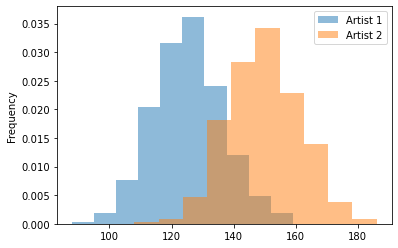

In [21]:
# Histogram of tokens for number of tokens in each song

num_replicates = 1000

df_ex = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df_ex.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The `'s'` character represents a space, while the `'+'` indicates more than one. Therefore the regular expression `'\s+'` matches on any part of text that consists of one or more spaces.


In [22]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
Adele     AxesSubplot(0.125,0.125;0.775x0.755)
Eminem    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

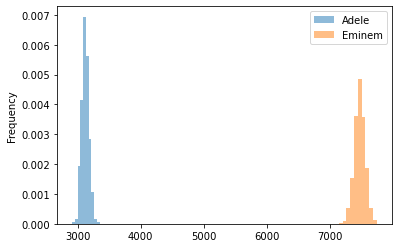

In [23]:
# Your lyric length comparison chart here. 

df_plot = pd.DataFrame({
    "artist" : ['Eminem'] * num_replicates + ['Adele'] * num_replicates,
    "length" : np.concatenate((np.random.poisson(len(eminem_tokens),num_replicates),np.random.poisson(len(adele_tokens),num_replicates)))
})

df_plot.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)